## Klout   
*Lesson 20, Quizzes 26-37*

### Distribution of Klout scores

In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [2]:
scores = genfromtxt("datasets/klout_scores.csv", delimiter = ",") # load the data

# calculate the mean and standard deviation

mean = np.mean(scores)
print("The mean equals {:.2f}".format(mean))

std = np.std(scores)
print("The standard deviation equals {:.2f}".format(std))

The mean equals 37.72
The standard deviation equals 16.04


In [3]:
def get_distribution(array, color, x):
    with plt.style.context('seaborn-whitegrid'):
        plt.figure(figsize=(8.5,5))
        plt.hist(array, bins='auto', alpha=0.3, ec='black', color=color)
        plt.xlabel(x, fontsize=13.5)
        plt.ylabel("Frequency", fontsize=13.5)
    
        plt.show()

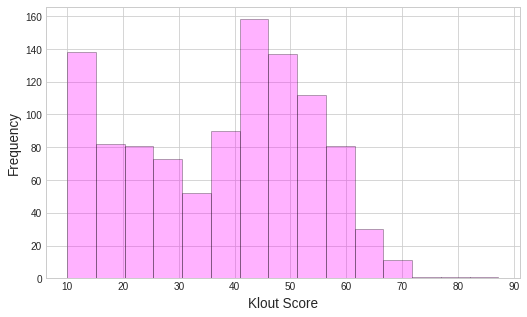

In [4]:
# distribution of Klout scores

get_distribution(scores, "fuchsia", "Klout Score")

### Sampling distribution

Let's take *10,000* samples of size *35* from our data, find the mean of each sample, and visualize the distribution of sample means:

In [5]:
from numpy import random
from scipy.stats import norm

In [6]:
def get_samples(array, sample_size, n_samples):
    samples = np.zeros((n_samples,sample_size))
    for i in range(0, n_samples):
        sample = random.choice(array, size=sample_size, replace=False)
        samples[i] = sample
    
    return samples

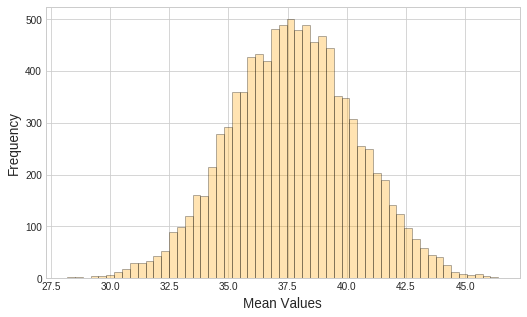

In [7]:
samples = get_samples(scores,35,10000)
sample_means = np.mean(samples, axis=1) # calculate the mean of each sample
get_distribution(sample_means, "orange", "Mean Values") # distribution of sample means

In [8]:
# calculate the standard deviation of the sampling distribution (standard error)

stderr = std/np.sqrt(35)
print("The standard error is {:.2f}".format(stderr))

# calculate the z-score for the sample of Bieber Tweeeter users
# the average Klout score of this group is 40

z = np.round((40-mean)/stderr, 2)
print("The z-score is {}".format(z))

# calculate the probability of randomly drawing a sample of size 35 with a mean of at least 40

p = norm.cdf(z) # the probability of getting less than a mean of 40
print("The probability is {:.4f}".format(1-p))

The standard error is 2.71
The z-score is 0.84
The probability is 0.2005


### *n* = 250

What if we inrease our sample size from *35* to *250*? Let's assume that the average Klout score is the same, i.e., <i>40</i>.

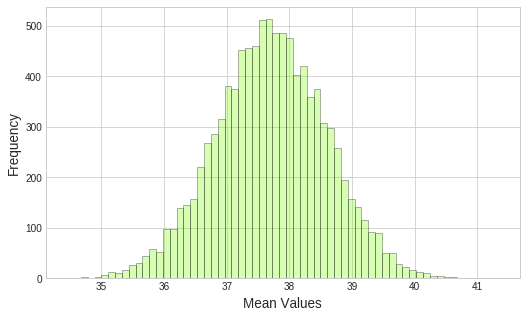

In [9]:
samples_250 = get_samples(scores,250,10000)
sample_means_250 = np.mean(samples_250, axis=1) # calculate the mean of each sample
get_distribution(sample_means_250, "lawngreen", "Mean Values")

In [10]:
# calculate the standard error of the new sampling distribution

stderr_250 = np.round(std/np.sqrt(250), 2)
print("The standard error is {}".format(stderr_250))

# calculate the z-score for a mean of 40 from a sample of size 250

z_250 = np.round((40-mean)/stderr_250, 2)
print("The z-score is {}".format(z_250))

# calculate the probability of randomly drawing a sample of size 250 with a mean of at least 40

p_250 = norm.cdf(z_250)
print("The probability is {:.4f}".format(1-p_250))

The standard error is 1.01
The z-score is 2.26
The probability is 0.0119


*The standard error* becomes smaller as the sample size increases, so the second sampling distribution is a lot skinnier than the first one: 

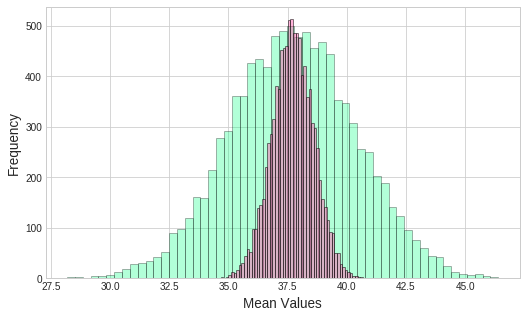

In [11]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8.5,5))
    plt.hist(sample_means, bins='auto', alpha=0.3, ec='black', color="springgreen")
    plt.hist(sample_means_250, bins='auto', alpha=0.5, ec='black', color="hotpink")
    plt.xlabel("Mean Values", fontsize=13.5)
    plt.ylabel("Frequency", fontsize=13.5)
    
    plt.show()